## Zadanie 1 - Zaimplementuj i uruchom algorytm Grovera dla n=2 (z zadania domowego) (1pkt)

In [11]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from numpy import pi
from qiskit.visualization import plot_histogram

qreg_q = QuantumRegister(3, 'q')
qc = QuantumCircuit(qreg_q)

qc.initialize("100")
qc.h(qreg_q[1])
qc.h(qreg_q[2])
qc.h(qreg_q[0])

qc.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
qc.x(qreg_q[0])
qc.ccx(qreg_q[0], qreg_q[1], qreg_q[2])
qc.x(qreg_q[0])

qc.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
qc.h(qreg_q[0])
qc.h(qreg_q[1])
qc.x(qreg_q[0])
qc.x(qreg_q[1])
qc.h(qreg_q[1])
qc.cx(qreg_q[0], qreg_q[1])
qc.h(qreg_q[1])
qc.x(qreg_q[1])
qc.x(qreg_q[0])
qc.h(qreg_q[0])
qc.h(qreg_q[1])

qc.draw()

┌────────────────────┐┌───┐ ░ ┌───┐     ┌───┐ ░ ┌───┐┌───┐          ┌───┐»
q_0: ┤0                   ├┤ H ├─░─┤ X ├──■──┤ X ├─░─┤ H ├┤ X ├───────■──┤ X ├»
     │                    │├───┤ ░ └───┘  │  └───┘ ░ ├───┤├───┤┌───┐┌─┴─┐├───┤»
q_1: ┤1 Initialize(1,0,0) ├┤ H ├─░────────■────────░─┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├»
     │                    │├───┤ ░      ┌─┴─┐      ░ └───┘└───┘└───┘└───┘└───┘»
q_2: ┤2                   ├┤ H ├─░──────┤ X ├──────░──────────────────────────»
     └────────────────────┘└───┘ ░      └───┘      ░                          »
«     ┌───┐     
«q_0: ┤ H ├─────
«     ├───┤┌───┐
«q_1: ┤ X ├┤ H ├
«     └───┘└───┘
«q_2: ──────────
«


Statevector([-1.34692639e-17+0.j, -1.78038433e-34+0.j, -7.07106781e-01+0.j,
              6.29457921e-18+0.j,  1.34692639e-17+0.j,  1.78038433e-34+0.j,
              7.07106781e-01+0.j, -6.29457921e-18+0.j],
            dims=(2, 2, 2))


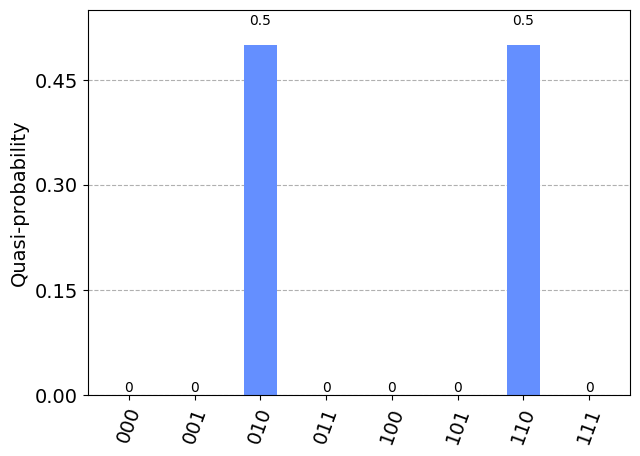

In [12]:
from qiskit.quantum_info import Statevector

print()
state = Statevector.from_instruction(qc)
print(state)
state.draw('latex')

ideal_distribution = state.probabilities_dict()

plot_histogram(ideal_distribution)

## Zadanie 2 - Zaimplementuj algorytm Grovera  do rozwiązywania Sudoku (2 pkt)

- plansza 2x2
- wartości {0, 1}

![](sudoku_board.png)

In [13]:
clause_list = [[0,1],
               [0,2],
               [1,3],
               [2,3]]

def XOR(qc, a, b, output):
    qc.cx(a, output)
    qc.cx(b, output)

from qiskit import QuantumRegister, AncillaRegister, QuantumCircuit, ClassicalRegister
# We will use separate registers to name the bits
in_qubits = QuantumRegister(2, name='input')
out_qubit = QuantumRegister(1, name='output')
qc = QuantumCircuit(in_qubits, out_qubit)
XOR(qc, in_qubits[0], in_qubits[1], out_qubit)
qc.draw()

input_0: ──■───────
           │       
input_1: ──┼────■──
         ┌─┴─┐┌─┴─┐
 output: ┤ X ├┤ X ├
         └───┘└───┘

In [14]:
# Create separate registers to name bits
var_qubits = QuantumRegister(4, name='v')  # variable bits
clause_qubits = QuantumRegister(4, name='c')  # bits to store clause-checks

# Create quantum circuit
qc = QuantumCircuit(var_qubits, clause_qubits)

# Use XOR gate to check each clause
i = 0
for clause in clause_list:
    XOR(qc, clause[0], clause[1], clause_qubits[i])
    i += 1

qc.draw()

v_0: ──■─────────■───────────────────────────
       │         │                           
v_1: ──┼────■────┼─────────■─────────────────
       │    │    │         │                 
v_2: ──┼────┼────┼────■────┼─────────■───────
       │    │    │    │    │         │       
v_3: ──┼────┼────┼────┼────┼────■────┼────■──
     ┌─┴─┐┌─┴─┐  │    │    │    │    │    │  
c_0: ┤ X ├┤ X ├──┼────┼────┼────┼────┼────┼──
     └───┘└───┘┌─┴─┐┌─┴─┐  │    │    │    │  
c_1: ──────────┤ X ├┤ X ├──┼────┼────┼────┼──
               └───┘└───┘┌─┴─┐┌─┴─┐  │    │  
c_2: ────────────────────┤ X ├┤ X ├──┼────┼──
                         └───┘└───┘┌─┴─┐┌─┴─┐
c_3: ──────────────────────────────┤ X ├┤ X ├
                                   └───┘└───┘

In [15]:
from qiskit.circuit.library import C4XGate
# Create separate registers to name bits
var_qubits = QuantumRegister(4, name='v')
clause_qubits = QuantumRegister(4, name='c')
output_qubit = QuantumRegister(1, name='out')
qc = QuantumCircuit(var_qubits, clause_qubits, output_qubit)

# Compute clauses
i = 0
for clause in clause_list:
    XOR(qc, clause[0], clause[1], clause_qubits[i])
    i += 1

# Flip 'output' bit if all clauses are satisfied
qc.append(C4XGate(),[clause_qubits[0], clause_qubits[1], clause_qubits[2], clause_qubits[3], output_qubit[0]])

qc.draw()

v_0: ──■─────────■────────────────────────────────
       │         │                                
v_1: ──┼────■────┼─────────■──────────────────────
       │    │    │         │                      
v_2: ──┼────┼────┼────■────┼─────────■────────────
       │    │    │    │    │         │            
v_3: ──┼────┼────┼────┼────┼────■────┼────■───────
     ┌─┴─┐┌─┴─┐  │    │    │    │    │    │       
c_0: ┤ X ├┤ X ├──┼────┼────┼────┼────┼────┼────■──
     └───┘└───┘┌─┴─┐┌─┴─┐  │    │    │    │    │  
c_1: ──────────┤ X ├┤ X ├──┼────┼────┼────┼────■──
               └───┘└───┘┌─┴─┐┌─┴─┐  │    │    │  
c_2: ────────────────────┤ X ├┤ X ├──┼────┼────■──
                         └───┘└───┘┌─┴─┐┌─┴─┐  │  
c_3: ──────────────────────────────┤ X ├┤ X ├──■──
                                   └───┘└───┘┌─┴─┐
out: ────────────────────────────────────────┤ X ├
                                             └───┘

In [16]:
from qiskit.circuit.library import C4XGate
var_qubits = QuantumRegister(4, name='v')
clause_qubits = QuantumRegister(4, name='c')
output_qubit = QuantumRegister(1, name='out')
cbits = ClassicalRegister(4, name='cbits')
qc = QuantumCircuit(var_qubits, clause_qubits, output_qubit, cbits)

def sudoku_oracle(qc, clause_list, clause_qubits):
    # Compute clauses
    i = 0
    for clause in clause_list:
        XOR(qc, clause[0], clause[1], clause_qubits[i])
        i += 1

    # Flip 'output' bit if all clauses are satisfied
    qc.append(C4XGate(),[clause_qubits[0], clause_qubits[1], clause_qubits[2], clause_qubits[3], output_qubit[0]])
    # Uncompute clauses to reset clause-checking bits to 0
    i = 0
    for clause in clause_list:
        XOR(qc, clause[0], clause[1], clause_qubits[i])
        i += 1

sudoku_oracle(qc, clause_list, clause_qubits)
qc.draw()

»
    v_0: ──■─────────■──────────────────────────────────■─────────■────────────»
           │         │                                  │         │            »
    v_1: ──┼────■────┼─────────■────────────────────────┼────■────┼─────────■──»
           │    │    │         │                        │    │    │         │  »
    v_2: ──┼────┼────┼────■────┼─────────■──────────────┼────┼────┼────■────┼──»
           │    │    │    │    │         │              │    │    │    │    │  »
    v_3: ──┼────┼────┼────┼────┼────■────┼────■─────────┼────┼────┼────┼────┼──»
         ┌─┴─┐┌─┴─┐  │    │    │    │    │    │       ┌─┴─┐┌─┴─┐  │    │    │  »
    c_0: ┤ X ├┤ X ├──┼────┼────┼────┼────┼────┼────■──┤ X ├┤ X ├──┼────┼────┼──»
         └───┘└───┘┌─┴─┐┌─┴─┐  │    │    │    │    │  └───┘└───┘┌─┴─┐┌─┴─┐  │  »
    c_1: ──────────┤ X ├┤ X ├──┼────┼────┼────┼────■────────────┤ X ├┤ X ├──┼──»
                   └───┘└───┘┌─┴─┐┌─┴─┐  │    │    │            └───┘└───┘┌─┴─┐»
    c_2: ────────────────────┤ X ├┤ X ├──┼────┼────■──────────────────────┤ X ├»
                             └───┘└───┘┌─┴─┐┌─┴─┐  │                      └───┘»
    c_3: ──────────────────────────────┤ X ├┤ X ├──■───────────────────────────»
                                       └───┘└───┘┌─┴─┐                         »
    out: ────────────────────────────────────────┤ X ├─────────────────────────»
                                                 └───┘                         »
cbits: 4/══════════════════════════════════════════════════════════════════════»
                                                                               »
«                        
«    v_0: ───────────────
«                        
«    v_1: ───────────────
«                        
«    v_2: ───────■───────
«                │       
«    v_3: ──■────┼────■──
«           │    │    │  
«    c_0: ──┼────┼────┼──
«           │    │    │  
«    c_1: ──┼────┼────┼──
«         ┌─┴─┐  │    │  
«    c_2: ┤ X ├──┼────┼──
«         └───┘┌─┴─┐┌─┴─┐
«    c_3: ─────┤ X ├┤ X ├
«              └───┘└───┘
«    out: ───────────────
«                        
«cbits: 4/═══════════════
«

In [17]:
# how many iterations
from numpy import sqrt
(pi / 4) * sqrt((2 ** 4) / 2)

## 2.2 ~= 2

2.221441469079183

In [22]:
## before start - H before every bit in v-bits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from numpy import pi
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import C3XGate, C4XGate, CZGate, MCMT
from qiskit.quantum_info import Statevector

N = 4

c3z = MCMT('cz',3,1)

clause_list = [[0,1],
               [0,2],
               [1,3],
               [2,3]]

def XOR(qc, a, b, output):
    qc.cx(a, output)
    qc.cx(b, output)

def sudoku_oracle(qc, clause_list, clause_qubits):
    # Compute clauses
    i = 0
    for clause in clause_list:
        XOR(qc, clause[0], clause[1], clause_qubits[i])
        i += 1

    # Flip 'output' bit if all clauses are satisfied
    qc.append(C4XGate(),[clause_qubits[0], clause_qubits[1], clause_qubits[2], clause_qubits[3], output_qubit[0]])
    # Uncompute clauses to reset clause-checking bits to 0
    i = 0
    for clause in clause_list:
        XOR(qc, clause[0], clause[1], clause_qubits[i])
        i += 1

## now we need inversion - 4-bit gate with H X CZ
def inversion(qc, var_qubits):
    qc.barrier(var_qubits)
    qc.h(var_qubits)
    qc.x(var_qubits)
    qc.h(var_qubits[len(var_qubits)-1])
    qc.append(C3XGate(), [var_qubits[0], var_qubits[1], var_qubits[2], var_qubits[3]])
    # qc.compose(c3z,qubits=[var_qubits[0], var_qubits[1], var_qubits[2], var_qubits[3]],inplace=True)
    qc.h(var_qubits[len(var_qubits)-1])
    qc.barrier(var_qubits)
    qc.x(var_qubits)
    qc.h(var_qubits)

# Create separate registers to name bits
var_qubits = QuantumRegister(4, name='v')  # variable bits
clause_qubits = QuantumRegister(4, name='c')  # bits to store clause-checks
output_qubit = QuantumRegister(1, name='out')
cbits = ClassicalRegister(4, name='cbits')

# Create quantum circuit
qc = QuantumCircuit(var_qubits, clause_qubits, output_qubit, cbits)

## before start - H before out = 1
qc.x(output_qubit)
qc.barrier(var_qubits[0], var_qubits[1], var_qubits[1], var_qubits[2], var_qubits[3], output_qubit)
qc.h(output_qubit)

## before start - H before every bit in v-bits
for qubit in var_qubits:
    qc.h(qubit)

sudoku_oracle(qc, clause_list, clause_qubits)
inversion(qc, var_qubits)

sudoku_oracle(qc, clause_list, clause_qubits)
inversion(qc, var_qubits)

qc.barrier(var_qubits[0], var_qubits[1], var_qubits[1], var_qubits[2], var_qubits[3], output_qubit)

In [23]:
qc.measure(var_qubits, cbits)
qc.draw()

░ ┌───┐                                                       »
    v_0: ──────░─┤ H ├──■─────────■──────────────────────────────────■───────»
               ░ ├───┤  │         │                                  │       »
    v_1: ──────░─┤ H ├──┼────■────┼─────────■────────────────────────┼────■──»
               ░ ├───┤  │    │    │         │                        │    │  »
    v_2: ──────░─┤ H ├──┼────┼────┼────■────┼─────────■──────────────┼────┼──»
               ░ ├───┤  │    │    │    │    │         │              │    │  »
    v_3: ──────░─┤ H ├──┼────┼────┼────┼────┼────■────┼────■─────────┼────┼──»
               ░ └───┘┌─┴─┐┌─┴─┐  │    │    │    │    │    │       ┌─┴─┐┌─┴─┐»
    c_0: ─────────────┤ X ├┤ X ├──┼────┼────┼────┼────┼────┼────■──┤ X ├┤ X ├»
                      └───┘└───┘┌─┴─┐┌─┴─┐  │    │    │    │    │  └───┘└───┘»
    c_1: ───────────────────────┤ X ├┤ X ├──┼────┼────┼────┼────■────────────»
                                └───┘└───┘┌─┴─┐┌─┴─┐  │    │    │            »
    c_2: ─────────────────────────────────┤ X ├┤ X ├──┼────┼────■────────────»
                                          └───┘└───┘┌─┴─┐┌─┴─┐  │            »
    c_3: ───────────────────────────────────────────┤ X ├┤ X ├──■────────────»
         ┌───┐ ░ ┌───┐                              └───┘└───┘┌─┴─┐          »
    out: ┤ X ├─░─┤ H ├────────────────────────────────────────┤ X ├──────────»
         └───┘ ░ └───┘                                        └───┘          »
cbits: 4/════════════════════════════════════════════════════════════════════»
                                                                             »
«                                        ░ ┌───┐┌───┐                ░ ┌───┐»
«    v_0: ──■────────────────────────────░─┤ H ├┤ X ├───────■────────░─┤ X ├»
«           │                            ░ ├───┤├───┤       │        ░ ├───┤»
«    v_1: ──┼─────────■──────────────────░─┤ H ├┤ X ├───────■────────░─┤ X ├»
«           │         │                  ░ ├───┤├───┤       │        ░ ├───┤»
«    v_2: ──┼────■────┼─────────■────────░─┤ H ├┤ X ├───────■────────░─┤ X ├»
«           │    │    │         │        ░ ├───┤├───┤┌───┐┌─┴─┐┌───┐ ░ ├───┤»
«    v_3: ──┼────┼────┼────■────┼────■───░─┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─░─┤ X ├»
«           │    │    │    │    │    │   ░ └───┘└───┘└───┘└───┘└───┘ ░ └───┘»
«    c_0: ──┼────┼────┼────┼────┼────┼──────────────────────────────────────»
«         ┌─┴─┐┌─┴─┐  │    │    │    │                                      »
«    c_1: ┤ X ├┤ X ├──┼────┼────┼────┼──────────────────────────────────────»
«         └───┘└───┘┌─┴─┐┌─┴─┐  │    │                                      »
«    c_2: ──────────┤ X ├┤ X ├──┼────┼──────────────────────────────────────»
«                   └───┘└───┘┌─┴─┐┌─┴─┐                                    »
«    c_3: ────────────────────┤ X ├┤ X ├────────────────────────────────────»
«                             └───┘└───┘                                    »
«    out: ──────────────────────────────────────────────────────────────────»
«                                                                           »
«cbits: 4/══════════════════════════════════════════════════════════════════»
«                                                                           »
«         ┌───┐                                                            »
«    v_0: ┤ H ├──■─────────■──────────────────────────────────■─────────■──»
«         ├───┤  │         │                                  │         │  »
«    v_1: ┤ H ├──┼────■────┼─────────■────────────────────────┼────■────┼──»
«         ├───┤  │    │    │         │                        │    │    │  »
«    v_2: ┤ H ├──┼────┼────┼────■────┼─────────■──────────────┼────┼────┼──»
«         ├───┤  │    │    │    │    │         │              │    │    │  »
«    v_3: ┤ H ├──┼────┼────┼────┼────┼────■────┼────■─────────┼────┼────┼──»
«         └───┘┌─┴─┐┌─┴─┐  │    │    │    │    │    │       ┌─┴─┐┌─┴─┐  │  »
«    c_0: ─────┤ X ├┤ X ├

C:\Users\przemek\DATA\Documents\agh\semestr_8\kwantówka\laby\code\.venv\Lib\site-packages\qiskit_ibm_runtime\session.py:156: UserWarning: Session is not supported in local testing mode or when using a simulator.
  warnings.warn(
C:\Users\przemek\DATA\Documents\agh\semestr_8\kwantówka\laby\code\.venv\Lib\site-packages\qiskit_ibm_runtime\qiskit_runtime_service.py:879: UserWarning: Cloud simulators have been deprecated and will be removed on 15 May 2024. Use the new local testing mode in qiskit-ibm-runtime version 0.22.0 or later to meet your debugging needs.
  warnings.warn(warning_message)


SamplerResult(quasi_dists=[{14: 0.01, 6: 0.39, 2: 0.01, 0: 0.01, 9: 0.53, 12: 0.01, 5: 0.02, 8: 0.02}], metadata=[{'shots': 100, 'circuit_metadata': {}}])


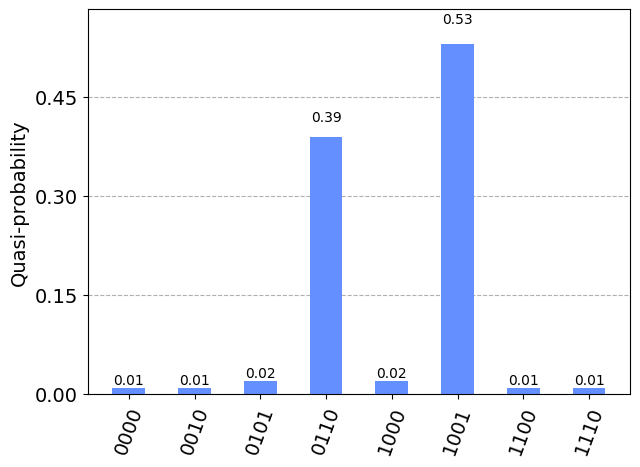

In [25]:
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService()

## probabilities from simulator
backend = service.backend('ibmq_qasm_simulator')

optimization_level = 0
t_qc = transpile(qc, backend, optimization_level=optimization_level, seed_transpiler=0)

from qiskit_ibm_runtime import  Batch, Sampler
with Batch(service=service, backend=backend):
    sampler = Sampler()
    job = sampler.run(circuits=[t_qc],shots=100)
    result_sim = job.result()

print(result_sim)
plot_histogram(result_sim.quasi_dists[0].binary_probabilities())